# Análise de Eficiência

  No artigo The Measurement of Productive Efficiency, FARRELL (1957) descreve que a importância da medição de eficiência se apresenta tanto para a teoria econômica como para decisores da esfera pública. As medidas empíricas auxiliam no entendimento de quanto pode-se esperar de uma dada indústria crescer, sem necessariamente aumentar os seus recursos.
    
  Estudos sobre análise de eficiência englobam diversos campos e áreas, como transporte aéreo SCHERAGA (2004), análise de custo e benefício HOFLER (2004), educação DODSON (2004), produção de energia COOK (2005) e diversos outros temas, onde envolvam produção e insumos. Segundo FRIED (2008) a eficiência de um produtor é entendida como uma comparação entre os valores ótimos e observados das entradas e saídas. E essa atividade de medição envolve duas possibilidades: observar as saídas e o seu maior potencial que poderia ser obtido pelos seus insumos, ou comparar o mínimo de insumos dado os requisitos de saída. Há entretanto uma dificuldade clara nesse tipo de análise, o devido endereçamento dos valores ótimos de potencial, para qualquer que seja o objetivo econômico.
    
  Neste trabalho irá se discorrer sobre a análise envoltória de dados e o método não paramétrico dos mínimos quadrados convexos, suas formas de endereçar a variabilidade da informação, além de uma forma para solucionar por meio da programação quadrática a solução dos modelos.

#  DEA

  Para entender o cálculo de eficiência iniciamos pela simples ideia da engenharia. No artigo Measuring the Efficiency of Decision Making Units, CHARNES et al. (1978) mostra o seguinte modelo, onde o cálculo para entendimento sobre análise de eficiência é a taxa entre as saídas y divididas pela entrada x, gerando uma eficiência eij sobre as unidades para tomada de decisão (DMUs) COOK e SEIFORD (2009). 
        
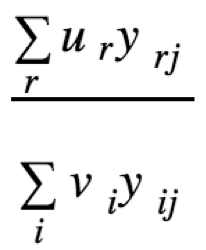
        
  Podendo os valores de u e v serem, por exemplo, os preços e custos para os respectivos multiplicadores, esses serão maiores que zero e determinados pela solução do problema. Reduzindo para formas lineares de programação temos o modelo conhecido como input-oriented e trabalha da seguinte maneira para maximizar a eficiência, sendo ε a restrição adicional para garantir variáveis positivas. Com uma simples substituição de variáveis podemos criar o problema primal e dual de forma linear. Abaixo temos o modelo primal do problema:
        
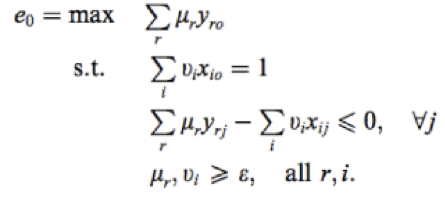
        
  Entretanto para entender sobre a análise envoltória de dados é preciso entender da dualidade do problema e verificar o que é conhecido como o modelo primal, nesse caso as restrições do problema são um conjunto de possibilidades de produção:
        
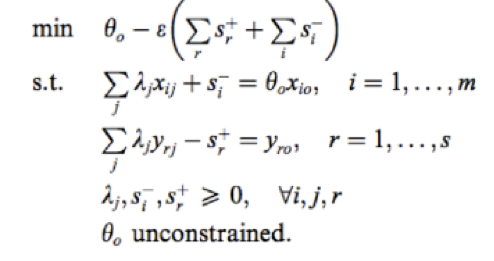
        
  Veja que esse modelo cria pontos de Bench-Mark Figura, ou seja, há um (ou mais pontos) que apresentam eficiência de 1.0 (A e B) e estes criam a fronteira para o cálculo dos demais. Veja que para o exemplo apresentado, ou para qualquer fato generalizado, pode haver uma variável de folga si- positiva, ou seja, o dado que estiver sobre essa condição não estará devidamente envolto pela fronteira e será portanto considerado menos eficiente que os pontos de Bench-Mark.
        
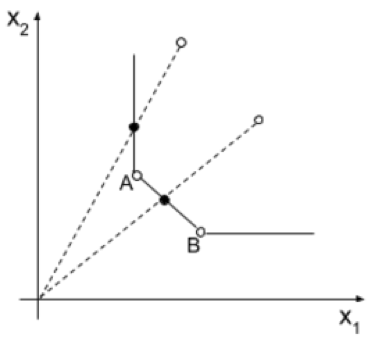
        
  Podemos dividir o modelo tradicional de eficiência de duas formas: análise envoltória de dados, como apresentada anteriormente e Análise Estocástica de Fronteira (SFA) Ver Aigner et al. 1977. Diferentemente do DEA a análise estocástica utiliza técnicas de regressão, o lado bom do SFA é a sua modelagem probabilística e sua capacidade de analisar desvios na fronteira, já que os dados tanto de input e output das empresas apresentam características aleatórias. A ponte entre essas duas abordagens é chamada de StoNED Análise Estocástica Não Paramétrica de Envoltória de Dados. Dessa forma não é necessário decidir se é mais importante modelar os ruídos ou impor axiomas das teorias produtivas.

# Vamos ao código!

In [1]:
import numpy as np
from scipy.optimize import linprog

### Dados

In [2]:
inputs = np.array([[262521.02907266,346760.656260418,461290.60448595,344188.863677228,294231.297066693,345783.525320436,670122.214940625,786296.233232622,727266.439858377,687145.593548194,613688.786934742,177792.367994311,411511.034331357,475665.819349655,2102727.8261244,337951.80373594,249122.662771625,985591.107898336,462249.512119451,1162960.84406201,219543.804449336,269794.86660802,655462.207361263,397384.070821253,106815.706326885,1092761.76551572,95351.9114732475,401326.485602659,244175.697125257,340890.953115421,162342.780828482,757537.710512358,273569.38914776]])
inputs = np.transpose(inputs)
outputs = np.array([[66340.66664431,3747393.48022296,1270383],[43983.62,2436898.18961101,779738],[55783.9667751247,4944348.40402283,2487418],[27521.3753251431,5127200.63772462,1666150],[41283,1573275.69512557,981474],[19147.96,3604922.36734455,947337],[55620.26491,4006688.94836309,1573244],[151465.12,8591502.61224053,2589757],[215567.507554621,5734685.95679654,2614497],[116756.978720517,3566443.67171848,2030533],[132607.15,5893023.34188831,3330813],[83766.1023802807,979048.500583751,524435],[125549.065648061,3169537.84386461,2125959],[166179.32,3453819.95821802,1219426],[503695.91,16209371.7122686,7734265],[86860.16263,1786173.25064945,1102039],[53314.9,1636960.87856232,564893],[262555.258252406,8050435.51908888,5364000],[137649.034,5462140.88174273,3188673],[235881.91,12152155.4777856,4181778],[51067,2314682.97113514,1243666],[23269.3,5256656.38072187,1543962],[123209.322,11898450.1996229,3952520],[110915.32575,6690349.38495425,2372709],[18410,532378.659461772,231148],[47335.086682134,21547864.014035,6654852],[27061.378,741649.485957319,415499],[87213.8,2194737.8173634,904703],[69882.77,1992640.43733767,1264848],[60840.5736579949,3399246.0459438,1378942],[27137.42,1292275.06355898,680262],[72536.3,11192013.5965572,3657749],[82441.55,4291848.57135431,1372749]])
print('Inputs: ',inputs.shape)
print('Outputs: ',outputs.shape)


matriz = np.hstack((outputs,-inputs))
print('Matriz de Entradas',matriz.shape)
print(inputs.shape[1],'primeiras de output e ',
      outputs.shape[1],'últimas de input')
#print(inputs)
#print(outputs)

Inputs:  (33, 1)
Outputs:  (33, 3)
Matriz de Entradas (33, 4)
1 primeiras de output e  3 últimas de input


# Primal CRS

In [3]:
pesos = np.random.normal(2,0.1,(inputs.shape[0],inputs.shape[1]+outputs.shape[1]))
print('pesos:',pesos.shape)
print('as',inputs.shape[1],'primeiras colunas representam u')
print('as',outputs.shape[1],'últimas colunas representam v')

pesos: (33, 4)
as 1 primeiras colunas representam u
as 3 últimas colunas representam v


### Resolvendo LP para o modelo Primal CRS

In [4]:
i = 0
DEA = np.zeros(inputs.shape[0])
while i < 33 :
    c = -np.multiply(matriz[i],np.array([1,1,1,0]))

    A_ub = matriz
    b_ub = np.zeros(matriz.shape[0])

    A_eq = np.array([[0,0,0,inputs[i][0]]])
    b_eq = np.array([1])

    res = linprog(c,A_eq=A_eq,b_eq=b_eq,A_ub=A_ub,b_ub=b_ub)
    pesos[i] = res['x']
    DEA[i] = (res['x'][0]*matriz[i][0] + 
              res['x'][1]*matriz[i][1] +
              res['x'][2]*matriz[i][2])/(
              res['x'][3]*(-matriz[i][3]))
    i = i + 1
    
print(DEA)

[ 0.87438555  0.43448736  0.80039329  0.79161273  0.48356673  0.54093348
  0.37176298  0.66797312  0.77940651  0.49997753  0.79066019  1.          0.885572
  0.83564351  0.68722646  0.66626431  0.57478098  0.84133332  1.
  0.67166654  0.8336986   1.          1.          1.          0.46274823
  1.          0.79383204  0.54905687  0.85512852  0.64625784  0.61846776
  0.7919057   1.        ]


### Resolvendo LP para o modelo Primal VRS

In [5]:
i = 0

matriz_vrs = np.hstack((np.hstack((
             outputs,-np.ones((outputs.shape[0],1)))),
             -inputs))

pesos_vrs = np.random.normal(2,0.1,(inputs.shape[0],inputs.shape[1]+1+outputs.shape[1]))

i = 0
DEA_vrs = np.zeros(inputs.shape[0])
while i<33:
    c_vrs = -np.multiply(matriz_vrs[i],np.array([1,1,1,1,0]))
    #print(c_vrs)
    #print(matriz_vrs[0])
    A_ub_vrs = matriz_vrs
    #print(inputs[0])
    b_ub_vrs = np.zeros(matriz_vrs.shape[0])

    A_eq_vrs = np.array([[0,0,0,0,inputs[i][0]]])
    #print(A_eq_vrs)
    b_eq_vrs = np.array([1])
    #print(b_eq_vrs)

    res_vrs = linprog(c_vrs,
              A_eq=A_eq_vrs,
              b_eq=b_eq_vrs,
              A_ub=A_ub_vrs,
              b_ub=b_ub_vrs,
              bounds=((0,None),(0,None),(0,None),(None,None),(0,None)))
     
    DEA_vrs[i] = (res_vrs['x'][0]*matriz_vrs[i][0] + 
                  res_vrs['x'][1]*matriz_vrs[i][1] +
                  res_vrs['x'][2]*matriz_vrs[i][2] +
                  res_vrs['x'][3]*matriz_vrs[i][3])/(
                  res_vrs['x'][4]*(-matriz_vrs[i][4]))
    i = i +1
    
print(DEA_vrs)

[ 0.92302775  0.50107867  0.81515427  0.82132188  0.57856445  0.59568498
  0.39282246  0.77798758  1.          0.50494736  0.79536302  1.
  0.92225773  1.          1.          0.67555509  0.6287882   1.          1.
  0.89546821  0.94060284  1.          1.          1.          0.89267688
  1.          1.          0.55056929  0.89833922  0.69626563  0.80908716
  0.79585373  1.        ]


# Dual CRS

In [6]:
E = 0.001
i = 0


#Matriz c
Theta_c  = np.array([[1]])
Lambda_c = np.zeros((1,inputs.shape[0]))
S_c      = np.full((1,inputs.shape[1]+outputs.shape[1]),E)
Matriz_c = np.squeeze(np.hstack((np.hstack((Theta_c,Lambda_c)),S_c)))
#print(Matriz_c)
Resultado = np.zeros((inputs.shape[0]))
#Matrix A
i =0
while i <33:
    Theta_A  = np.expand_dims(np.hstack((-inputs[i],np.zeros(outputs.shape[1]))),axis=0)
    Lambda_A = np.vstack((np.transpose(inputs),np.transpose(outputs)))
    S_A      = -np.identity(inputs.shape[1]+outputs.shape[1])
    S_A[0][0]= 1
    Matriz_A = np.transpose(np.vstack((np.vstack((Theta_A,np.transpose(Lambda_A))),S_A)))
    #print(Matriz_A)

    #Matriz b
    Matriz_b = np.hstack(([0],outputs[i]))
    #print(Matriz_b)

    res = linprog(Matriz_c,
              A_eq=Matriz_A,
              b_eq=Matriz_b,
              options=dict(bland=True,tol=0.00000001),
              bounds = ((None,None),
                        (0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),
                        (0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),
                        (0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),
                        (0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None)))
    Resultado[i] = res['x'][0]
    i = i + 1

print(Resultado)

[ 0.87497574  0.44027807  1.          0.79161273  1.          1.
  0.37176298  0.95141009  0.77940651  0.49997753  0.81922891  1.          1.
  1.          0.68722646  0.70764207  0.61935098  1.          1.
  0.67166654  0.8336986   1.          1.          1.          0.46274823
  1.          0.79383204  0.54905687  0.92759637  0.64625784  0.61846776
  0.7919057   1.        ]


### Modelo Dual CRS

In [7]:
E = 0.001
j = 0
Resultado = np.zeros((inputs.shape[0]))
while j < inputs.shape[0]:
    #Matriz c
    Theta_c  = np.array([[1]])
    Lambda_c = np.zeros((1,inputs.shape[0]))
    S_c      = np.full((1,inputs.shape[1]+outputs.shape[1]),E)
    Matriz_c = np.squeeze(np.hstack((np.hstack((Theta_c,Lambda_c)),S_c)))
    #print(Matriz_c)
    #Matrix A
    Theta_A  = np.expand_dims(np.hstack((-inputs[j],np.zeros(outputs.shape[1]+1))),axis=0)
    Lambda_A = np.vstack((np.vstack((np.transpose(inputs),np.transpose(outputs))),np.ones((1,outputs.shape[0]))))
    S_A      = -np.identity(inputs.shape[1]+outputs.shape[1])
    S_A      = np.vstack((S_A,np.zeros((1,inputs.shape[1]+outputs.shape[1]))))
    S_A[0][0]= 1

    #print(np.transpose(S_A))
    Matriz_A = np.transpose(np.vstack((np.vstack((Theta_A,np.transpose(Lambda_A))),np.transpose(S_A))))
    #print(Matriz_A)

    #Matriz b
    Matriz_b = np.hstack((np.hstack(([0],outputs[j])),1))
    #print(Matriz_b)
    res = linprog(Matriz_c,
              A_eq=Matriz_A,
              b_eq=Matriz_b,
              options=dict(bland=True,tol=0.00000001),
              bounds = ((None,None),
                        (0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),
                        (0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),
                        (0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),
                        (0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None)))
    
    Resultado[j] = res['x'][0]
    j = j + 1

print(Resultado)

[ 0.92302775  0.59463815  1.          0.87438583  1.          1.
  0.39282246  1.          1.          0.50494736  0.85881862  1.          1.
  1.          1.          0.72103558  0.88568599  1.          1.          1.
  0.99658353  1.          1.          1.          1.          1.          1.
  0.55056929  1.          0.69626563  1.          0.79585373  1.        ]
